## Lecture 4

### Pandas

In the previous lecture we saw the package `numpy`. `numpy` is fantastic for dealing with numerical data.

`pandas` is a package for dealing with *structured* data of mixed type. A common form of *structured data* is tabular, or spreadsheet data, where each column stores a different type of data (e.g. strings, dates, numerical values).

Rule of thumb: Whenever you reach for an Excel spreadsheet, you should strongly consider using `pandas` instead!

Let's get started with some data!

This example is adapted from Wes McKinney's excellent book "Python for Data Analysis"

MovieLens Latest Data - 100,000 ratings and 3,600 tag applications applied to 9,000 movies by 600 users. 

https://grouplens.org/datasets/movielens/

In [1]:
%cd /opt/notebooks
import urllib
urllib.request.urlretrieve("http://files.grouplens.org/datasets/movielens/ml-1m.zip", 
                           "ml-1m.zip")

/opt/notebooks


('ml-1m.zip', <http.client.HTTPMessage at 0x7f0b6841bfa0>)

In [2]:
import zipfile
with zipfile.ZipFile("ml-1m.zip","r") as f:
    f.extractall(".")

In [3]:
%ls

LICENSE    _config.yml  docker/  ml-1m.zip   start.sh*
README.md  build.sh*    ml-1m/   notebooks/


In [4]:
%cd ml-1m/

/opt/notebooks/ml-1m


In [5]:
%ls

README  movies.dat  ratings.dat  users.dat


In [6]:
%cat README

SUMMARY

These files contain 1,000,209 anonymous ratings of approximately 3,900 movies 
made by 6,040 MovieLens users who joined MovieLens in 2000.

USAGE LICENSE

Neither the University of Minnesota nor any of the researchers
involved can guarantee the correctness of the data, its suitability
for any particular purpose, or the validity of results based on the
use of the data set.  The data set may be used for any research
purposes under the following conditions:

     * The user may not state or imply any endorsement from the
       University of Minnesota or the GroupLens Research Group.

     * The user must acknowledge the use of the data set in
       publications resulting from the use of the data set
       (see below for citation information).

     * The user may not redistribute the data without separate
       permission.

     * The user may not use this information for any commercial or
       revenue-bearing purposes without first obtaining permission
       from a facult

In [7]:
%cd ../

/opt/notebooks


Let's read in the data from the `ratings.csv` file. pandas has tools that make reading data from CSV (comma-seperated value) files very easy.

In [8]:
import pandas as pd
import numpy as np
ratings_names = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv("ml-1m/ratings.dat", sep='::', header=None, engine='python', names=ratings_names)

In [9]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [10]:
users_names = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_csv("ml-1m/users.dat", sep='::', header=None, engine='python', names=users_names)

In [11]:
users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


* *Exercise*. Look in the `README` file. Understand the columns in the `movies.dat` file. Read in the file into a variables `movies`.

In [12]:
movies_names = ['movie_id', 'title', 'genres']
movies = pd.read_csv("ml-1m/movies.dat", sep='::', header=None, engine='python', names=movies_names)

In [13]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


Things to note:

* Each rating is tied to a single user by the `user_id`.
* Each rating is tied to a single movie by the `movie_id`.

We can use the `pandas.merge` function to join these seperate tables together.

In [14]:
data = pd.merge(pd.merge(ratings, users), movies)

In [15]:
data[:10]

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
5,18,1193,4,978156168,F,18,3,95825,One Flew Over the Cuckoo's Nest (1975),Drama
6,19,1193,5,982730936,M,1,10,48073,One Flew Over the Cuckoo's Nest (1975),Drama
7,24,1193,5,978136709,F,25,7,10023,One Flew Over the Cuckoo's Nest (1975),Drama
8,28,1193,3,978125194,F,25,1,14607,One Flew Over the Cuckoo's Nest (1975),Drama
9,33,1193,5,978557765,M,45,3,55421,One Flew Over the Cuckoo's Nest (1975),Drama


## Slicing and selecting data

pandas supports similar slicing and boolean operations on data as numpy.

Select the first 5 rows of the `gender` column.

In [16]:
data["gender"][:5]

0    F
1    M
2    M
3    M
4    M
Name: gender, dtype: object

Select all ratings from user number 3663.

In [17]:
data[data["user_id"] == 3663]

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
8641,3663,1287,4,966410744,F,35,9,17055,Ben-Hur (1959),Action|Adventure|Drama
32102,3663,1721,5,966410583,F,35,9,17055,Titanic (1997),Drama|Romance
48559,3663,260,3,966410744,F,35,9,17055,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi
64046,3663,648,5,966411209,F,35,9,17055,Mission: Impossible (1996),Action|Adventure|Mystery
69483,3663,2916,4,966410942,F,35,9,17055,Total Recall (1990),Action|Adventure|Sci-Fi|Thriller
...,...,...,...,...,...,...,...,...,...,...
870595,3663,2468,3,966411433,F,35,9,17055,Jumpin' Jack Flash (1986),Action|Comedy|Romance|Thriller
875803,3663,3404,1,966411003,F,35,9,17055,Titanic (1953),Action|Drama
877812,3663,170,4,966411096,F,35,9,17055,Hackers (1995),Action|Crime|Thriller
916857,3663,2457,5,966410898,F,35,9,17055,Running Scared (1986),Action|Comedy


* *Exercise*: Select all ratings made by women.

In [18]:
data[data["gender"] == "F"]

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
5,18,1193,4,978156168,F,18,3,95825,One Flew Over the Cuckoo's Nest (1975),Drama
7,24,1193,5,978136709,F,25,7,10023,One Flew Over the Cuckoo's Nest (1975),Drama
8,28,1193,3,978125194,F,25,1,14607,One Flew Over the Cuckoo's Nest (1975),Drama
19,59,1193,4,977934292,F,50,1,55413,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000199,5334,3382,5,960796159,F,56,13,46140,Song of Freedom (1936),Drama
1000200,5420,1843,3,960156505,F,1,19,14850,Slappy and the Stinkers (1998),Children's|Comedy
1000201,5433,286,3,960240881,F,35,17,45014,Nemesis 2: Nebula (1995),Action|Sci-Fi|Thriller
1000202,5494,3530,4,959816296,F,35,17,94306,Smoking/No Smoking (1993),Comedy


* *Exercise*: Select all *movies* that are of genres *Drama*.
  * Hint: Try the `.str.contains()` method.

In [19]:
movies[movies['genres'].str.contains('Drama')][:20]

,movie_id,title,genres
3,4,Waiting to Exhale (1995),Comedy|Drama
10,11,"American President, The (1995)",Comedy|Drama|Romance
13,14,Nixon (1995),Drama
15,16,Casino (1995),Drama|Thriller
16,17,Sense and Sensibility (1995),Drama|Romance
20,21,Get Shorty (1995),Action|Comedy|Drama
21,22,Copycat (1995),Crime|Drama|Thriller
23,24,Powder (1995),Drama|Sci-Fi
24,25,Leaving Las Vegas (1995),Drama|Romance
25,26,Othello (1995),Drama


* *Exercise*: Select all *movies* that are of *only* of genres *Drama*.
  * Hint: Use boolean selection.

In [20]:
movies[movies['genres'] == "Drama"]

,movie_id,title,genres
13,14,Nixon (1995),Drama
25,26,Othello (1995),Drama
26,27,Now and Then (1995),Drama
29,30,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,Drama
30,31,Dangerous Minds (1995),Drama
...,...,...,...
3845,3915,Girlfight (2000),Drama
3846,3916,Remember the Titans (2000),Drama
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama


## Grouping data

Sometimes it is useful to *group* data together by some common element. For example, say we want to group all of the ratings by title and count how many ratings there are for each title.

In [21]:
num_ratings_by_title = data.groupby('title').size()

In [22]:
num_ratings_by_title.sort_values(ascending=False)[:10]

title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
dtype: int64

*Exercise*: Show the user ids of the top 100 users who rated the most movies. Assign the result to `users_with_time`.

Tips: Use `groupby`, `sort_values`, `size`, slicing on `data`. Try writing it in one line!

In [23]:
users_ids_with_time = data.groupby('user_id').size().sort_values(ascending=False)[:100]
print(users_ids_with_time[:5])

user_id
4169    2314
1680    1850
4277    1743
1941    1595
1181    1521
dtype: int64


Let's find out about these people who can watch so many movies! What jobs do they have?

First of all, the original table only contains numbers which *map* to occupations. It would be nice to have the occupations rather than the numbers.

In [24]:
number_to_occupation = {0:  "other or not specified",
1: "academic/educator",
2: "artist",
3: "clerical/admin",
4: "college/grad student",
5: "customer service",
6: "doctor/health care",
7: "executive/managerial",
8: "farmer",
9: "homemaker",
10: "K-12 student",
11: "lawyer",
12: "programmer",
13: "retired",
14: "sales/marketing",
15: "scientist",
16: "self-employed",
17: "technician/engineer",
18: "tradesman/craftsman",
19: "unemployed",
20: "writer"}

In [25]:
users['occupation'] = users['occupation'].map(number_to_occupation)

In [26]:
users.head()

,user_id,gender,age,occupation,zip
0,1,F,1,K-12 student,48067
1,2,M,56,self-employed,70072
2,3,M,25,scientist,55117
3,4,M,45,executive/managerial,02460
4,5,M,25,writer,55455


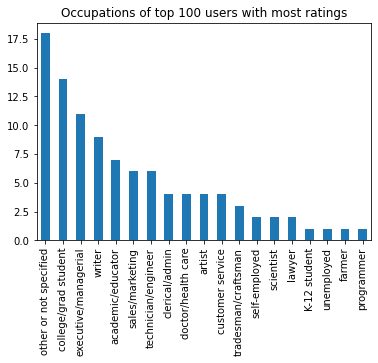

In [27]:
users_with_time = users[users["user_id"].isin(users_ids_with_time.index)]
(users_with_time['occupation'].value_counts()).plot(kind='bar', title="Occupations of top 100 users with most ratings")

* *Exercise*: Perform a similar analysis, but look at whether there are more male or female users in the top 100. Genera
  * Hint: Start with `users_with_time`. Use `value_counts`. Use the `.plot()` method.

In [28]:
users_with_time.head()

,user_id,gender,age,occupation,zip
351,352,M,18,college/grad student,60115
423,424,M,25,technician/engineer,55112
481,482,M,25,sales/marketing,55305
523,524,M,18,other or not specified,91320
530,531,F,18,sales/marketing,22206


In [29]:
count_gender_of_users_with_time = users_with_time["gender"].value_counts()
print(count_gender_of_users_with_time)

M    80
F    20
Name: gender, dtype: int64


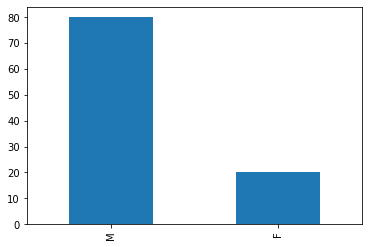

In [30]:
count_gender_of_users_with_time.plot(kind='bar')

## Pivot tables

'Pivot tables' are a concept popularised by Microsoft Excel. 
They are a tool for:
* first *aggregating* data by one or more *keys*, 
* and then arranging the data with some of the *keys* along the rows, and some along the columns.

Question: What is the mean movie rating for each film grouped by gender?

In [31]:
data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [32]:
mean_rating = data.pivot_table('rating', index='title', columns='gender', aggfunc=np.mean)
mean_rating.head()

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


* Exercise: Using the `.pivot_table()` method, also compute the standard deviation of the aggregated data.
  * Hint: Look at the documentation for the `aggfunc` argument to `pd.pivot_table` using the `?` command.
  * Hint: Find functions in `numpy` (`np`) that compute the mean and standard deviation.
  

In [33]:
pd.pivot_table?

In [34]:
mean_rating = data.pivot_table('rating', index='title', 
                               columns='gender', 
                               aggfunc=[np.mean, np.std])
mean_rating.head()

mean                 std          
gender                                F         M         F         M
$1,000,000 Duck (1971)         3.375000  2.761905  0.957427  1.135991
'Night Mother (1986)           3.388889  3.352941  1.021981  1.228015
'Til There Was You (1997)      2.675676  2.733333  0.973369  1.162919
'burbs, The (1989)             2.793478  2.962085  1.124532  1.099127
...And Justice for All (1979)  3.828571  3.689024  0.954424  0.862086

## Analysis - Getting answers to questions

Question:

1. Which films were most divisive between male and female viewers?

In [35]:
mean_rating.head()

mean                 std          
gender                                F         M         F         M
$1,000,000 Duck (1971)         3.375000  2.761905  0.957427  1.135991
'Night Mother (1986)           3.388889  3.352941  1.021981  1.228015
'Til There Was You (1997)      2.675676  2.733333  0.973369  1.162919
'burbs, The (1989)             2.793478  2.962085  1.124532  1.099127
...And Justice for All (1979)  3.828571  3.689024  0.954424  0.862086

In [36]:
mean_rating["mean_diff"] = mean_rating["mean"]["M"] - mean_rating["mean"]["F"]

In [37]:
sorted_by_diff = mean_rating.sort_values(by="mean_diff")

In [38]:
sorted_by_diff[:15]

mean            \
gender                                                     F         M   
James Dean Story, The (1957)                        4.000000  1.000000   
Country Life (1994)                                 5.000000  2.000000   
Spiders, The (Die Spinnen, 1. Teil: Der Goldene...  4.000000  1.000000   
Babyfever (1994)                                    3.666667  1.000000   
Woman of Paris, A (1923)                            5.000000  2.428571   
Cobra (1925)                                        4.000000  1.500000   
Other Side of Sunday, The (S�ndagsengler) (1996)    5.000000  2.928571   
To Have, or Not (1995)                              4.000000  2.000000   
For the Moment (1994)                               5.000000  3.000000   
Phat Beach (1996)                                   3.000000  1.000000   
Crude Oasis, The (1995)                             3.000000  1.000000   
Coming Apart (1969)                                 4.000000  2.000000   
Separation, The (La S�paration) (1994)              4.000000  2.000000   
Mad Dog Time (1996)                                 4.000000  2.000000   
Theodore Rex (1995)                                 3.000000  1.000000   

                                                         std            \
gender                                                     F         M   
James Dean Story, The (1957)                        0.000000       NaN   
Country Life (1994)                                      NaN  0.000000   
Spiders, The (Die Spinnen, 1. Teil: Der Goldene...  1.414214  0.000000   
Babyfever (1994)                                    0.577350       NaN   
Woman of Paris, A (1923)                                 NaN  1.272418   
Cobra (1925)                                             NaN  1.000000   
Other Side of Sunday, The (S�ndagsengler) (1996)    0.000000  1.542440   
To Have, or Not (1995)                                   NaN       NaN   
For the Moment (1994)                                    NaN  0.816497   
Phat Beach (1996)                                   0.000000  0.000000   
Crude Oasis, The (1995)                                  NaN       NaN   
Coming Apart (1969)                                      NaN       NaN   
Separation, The (La S�paration) (1994)                   NaN  1.414214   
Mad Dog Time (1996)                                      NaN  1.279204   
Theodore Rex (1995)                                      NaN  0.000000   

                                                   mean_diff  
gender                                                        
James Dean Story, The (1957)                       -3.000000  
Country Life (1994)                                -3.000000  
Spiders, The (Die Spinnen, 1. Teil: Der Goldene... -3.000000  
Babyfever (1994)                                   -2.666667  
Woman of Paris, A (1923)                           -2.571429  
Cobra (1925)                                       -2.500000  
Other Side of Sunday, The (S�ndagsengler) (1996)   -2.071429  
To Have, or Not (1995)                             -2.000000  
For the Moment (1994)                              -2.000000  
Phat Beach (1996)                                  -2.000000  
Crude Oasis, The (1995)                            -2.000000  
Coming Apart (1969)                                -2.000000  
Separation, The (La S�paration) (1994)             -2.000000  
Mad Dog Time (1996)                                -2.000000  
Theodore Rex (1995)                                -2.000000

*Exercise:* Take a look at the data in the above table. What is the problem with what we have done?

Answer: Some movies only have one or two ratings! They are not statistically significant. Let's remove movies with only a few ratings.

In [39]:
ratings_by_title = data.groupby('title').size()
ratings_by_title
active_titles = ratings_by_title.index[ratings_by_title >= 250]
print(active_titles)

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)


In [40]:
mean_rating = mean_rating.loc[active_titles]

In [41]:
mean_rating

mean                 std            \
gender                                    F         M         F         M   
title                                                                       
'burbs, The (1989)                 2.793478  2.962085  1.124532  1.099127   
10 Things I Hate About You (1999)  3.646552  3.311966  0.986965  0.973364   
101 Dalmatians (1961)              3.791444  3.500000  0.882525  1.015137   
101 Dalmatians (1996)              3.240000  2.911215  1.072412  1.099110   
12 Angry Men (1957)                4.184397  4.328421  0.883199  0.788587   
...                                     ...       ...       ...       ...   
Young Guns (1988)                  3.371795  3.425620  0.884337  1.037917   
Young Guns II (1990)               2.934783  2.904025  1.062537  1.074875   
Young Sherlock Holmes (1985)       3.514706  3.363344  0.889284  0.890709   
Zero Effect (1998)                 3.864407  3.723140  1.166451  1.011245   
eXistenZ (1999)                    3.098592  3.289086  1.185085  1.176281   

                                  mean_diff  
gender                                       
title                                        
'burbs, The (1989)                 0.168607  
10 Things I Hate About You (1999) -0.334586  
101 Dalmatians (1961)             -0.291444  
101 Dalmatians (1996)             -0.328785  
12 Angry Men (1957)                0.144024  
...                                     ...  
Young Guns (1988)                  0.053825  
Young Guns II (1990)              -0.030758  
Young Sherlock Holmes (1985)      -0.151362  
Zero Effect (1998)                -0.141266  
eXistenZ (1999)                    0.190494  

[1216 rows x 5 columns]

In [42]:
sorted_by_mean_diff = mean_rating.sort_values(by="mean_diff")
sorted_by_mean_diff

mean                 std  \
gender                                         F         M         F   
title                                                                  
Dirty Dancing (1987)                    3.790378  2.959596  1.105181   
Jumpin' Jack Flash (1986)               3.254717  2.578358  1.078459   
Grease (1978)                           3.975265  3.367041  1.022490   
Little Women (1994)                     3.870588  3.321739  0.887630   
Steel Magnolias (1989)                  3.901734  3.365957  0.906467   
...                                          ...       ...       ...   
Cable Guy, The (1996)                   2.250000  2.863787  1.051390   
Longest Day, The (1962)                 3.411765  4.031447  0.957194   
Dumb & Dumber (1994)                    2.697987  3.336595  1.354196   
Kentucky Fried Movie, The (1977)        2.878788  3.555147  1.023400   
Good, The Bad and The Ugly, The (1966)  3.494949  4.221300  1.146189   

                                                 mean_diff  
gender                                         M            
title                                                       
Dirty Dancing (1987)                    1.087738 -0.830782  
Jumpin' Jack Flash (1986)               1.134007 -0.676359  
Grease (1978)                           1.102666 -0.608224  
Little Women (1994)                     0.903675 -0.548849  
Steel Magnolias (1989)                  1.106561 -0.535777  
...                                          ...       ...  
Cable Guy, The (1996)                   1.100629  0.613787  
Longest Day, The (1962)                 0.847497  0.619682  
Dumb & Dumber (1994)                    1.277333  0.638608  
Kentucky Fried Movie, The (1977)        1.007669  0.676359  
Good, The Bad and The Ugly, The (1966)  0.814168  0.726351  

[1216 rows x 5 columns]

*Exercise*: Which 20 films had the widest difference of opinion?
  * a) amongst males.
  * b) amongst females.
  * c) amongst people.
 
Tips: Start with `mean_rating`. Select column using `["std"]`. Use `.sort_values`. Reverse using `[start:stop:slice]`.

In [43]:
mean_rating["std"].sort_values(by="M")[-1::-1]

gender,F,M
title,,
"Blair Witch Project, The (1999)",1.313929,1.317775
Natural Born Killers (1994),1.355926,1.298487
Dumb & Dumber (1994),1.354196,1.277333
Tank Girl (1995),1.300054,1.264366
Serial Mom (1994),1.125951,1.257872
...,...,...
Raiders of the Lost Ark (1981),0.792796,0.699111
Rear Window (1954),0.671284,0.696009
"Shawshank Redemption, The (1994)",0.719194,0.693091


In [44]:
mean_rating["std"].sort_values(by="F", ascending=False)[0:20]

gender,F,M
title,,
Soldier (1998),1.374946,1.048801
"South Park: Bigger, Longer and Uncut (1999)",1.373668,1.182896
"Nightmare on Elm Street, A (1984)",1.365397,1.131927
Natural Born Killers (1994),1.355926,1.298487
Dumb & Dumber (1994),1.354196,1.277333
"Clockwork Orange, A (1971)",1.352036,1.037948
Rocky IV (1985),1.342549,1.135562
Bicentennial Man (1999),1.333791,1.219125
Evil Dead II (Dead By Dawn) (1987),1.331697,1.061631


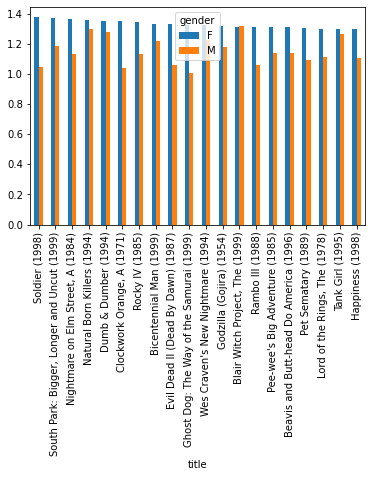

In [45]:
(mean_rating["std"].sort_values(by="F", ascending=False)[0:20]).plot(kind='bar')

## Work in progress

## Mini-project: Eurostat data

### Performing some simple analysis on Eurostat data

1. Get the data.
2. Clean the data.
3. Manipulate the data.
4. Analyse the data.

https://ec.europa.eu/eurostat

### How can we get Eurostat data?

In [46]:
!pip install pandasdmx

     |████████████████████████████████| 78 kB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 12.3 MB 17.6 MB/s eta 0:00:01   |███▋                            | 1.4 MB 4.5 MB/s eta 0:00:03     |████▊                           | 1.8 MB 4.5 MB/s eta 0:00:03


In [ ]:
from pandasdmx import Request
estat = Request('ESTAT')
resp = estat.data('une_rt_a', params={'startPeriod': '2007'})

/opt/conda/lib/python3.8/site-packages/pandasdmx/remote.py:11: RuntimeWarning: optional dependency requests_cache is not installed; cache options to Session() have no effect
  warn(
